# EDA

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# memanggil data dan memberi nama kolom
data = pd.read_csv('pima_indians_diabetes.csv', header = None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

data = data.astype(float)

# Drop the missing values
data = data.dropna()


# Analisis

## Mengolah Data Sesuai dengan Variabel yang Ada

In [33]:
# membagi data menjadi variabel independen (X) dan dependen (y)
X = data[['Pregnancies', 'Glucose', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Standarisasi fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering dengan KMeans (2 cluster)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
X_kmeans = data.drop(columns=['BloodPressure', 'Outcome'])

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)


In [36]:
from sklearn.cluster import KMeans

# Uji 2 cluster (karena dataset ini binary asalnya: diabetes / tidak)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil cluster ke DataFrame
data['Cluster'] = kmeans.labels_


c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix

def evaluasi_cluster(data, true_col='Outcome', cluster_col='Cluster'):
    # Buat versi asli dan versi dibalik
    cluster_as_is = data[cluster_col]
    cluster_reversed = 1 - data[cluster_col]

    # Hitung metrik
    ari_as_is = adjusted_rand_score(data[true_col], cluster_as_is)
    ari_rev = adjusted_rand_score(data[true_col], cluster_reversed)

    acc_as_is = accuracy_score(data[true_col], cluster_as_is)
    acc_rev = accuracy_score(data[true_col], cluster_reversed)

    cm_as_is = confusion_matrix(data[true_col], cluster_as_is)
    cm_rev = confusion_matrix(data[true_col], cluster_reversed)

    # Tampilkan hasil
    print("=== 🔹 As-Is Cluster ===")
    print("Confusion Matrix:\n", cm_as_is)
    print(f"ARI : {ari_as_is:.4f}")
    print(f"Akurasi : {acc_as_is:.4f}")

    print("\n=== 🔸 Reversed Cluster ===")
    print("Confusion Matrix:\n", cm_rev)
    print(f"ARI : {ari_rev:.4f}")
    print(f"Akurasi : {acc_rev:.4f}")

    # Pilih berdasarkan akurasi tertinggi
    if acc_as_is >= acc_rev:
        print("\n✅ Dipilih: As-Is Cluster")
        data['Final_Cluster'] = cluster_as_is
    else:
        print("\n✅ Dipilih: Reversed Cluster")
        data['Final_Cluster'] = cluster_reversed

    return data

data = evaluasi_cluster(data)



=== 🔹 As-Is Cluster ===
Confusion Matrix:
 [[372 128]
 [122 146]]
ARI : 0.1142
Akurasi : 0.6745

=== 🔸 Reversed Cluster ===
Confusion Matrix:
 [[128 372]
 [146 122]]
ARI : 0.1142
Akurasi : 0.3255

✅ Dipilih: As-Is Cluster


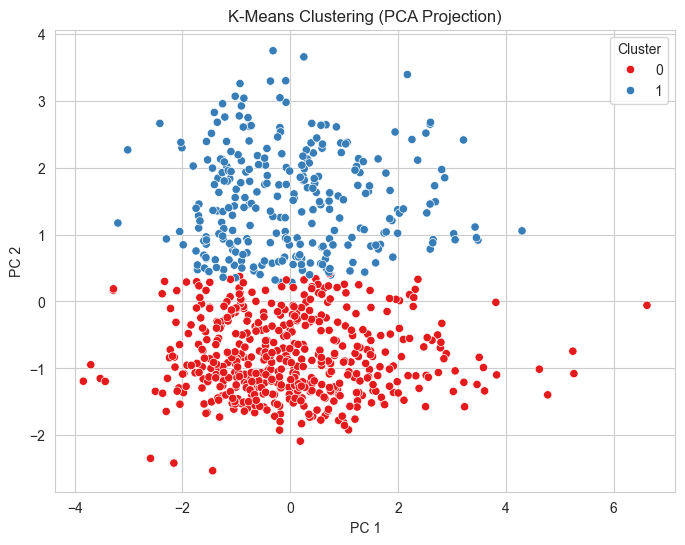

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [39]:
# Buat DataFrame hasil reduksi + label
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Outcome'] = data['Outcome'].values
df_viz['Cluster'] = data['Cluster'].values

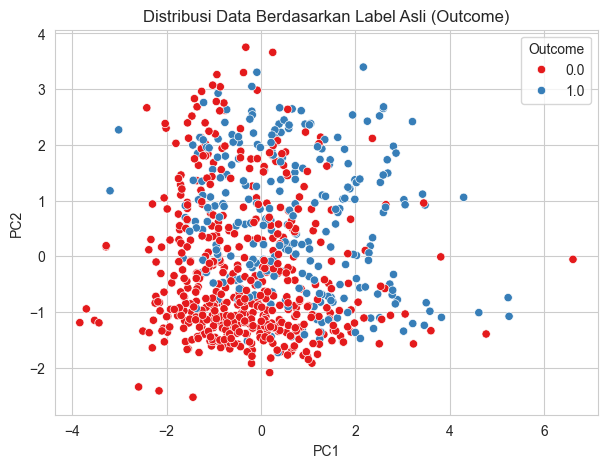

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Outcome', palette='Set1')
plt.title("Distribusi Data Berdasarkan Label Asli (Outcome)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Outcome')
plt.grid(True)
plt.show()


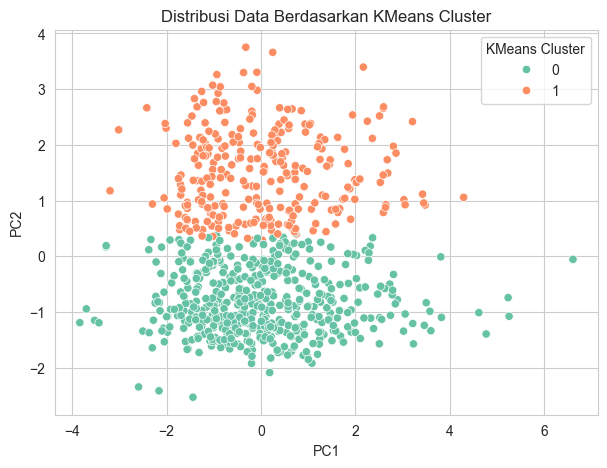

In [41]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Distribusi Data Berdasarkan KMeans Cluster")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='KMeans Cluster')
plt.grid(True)
plt.show()


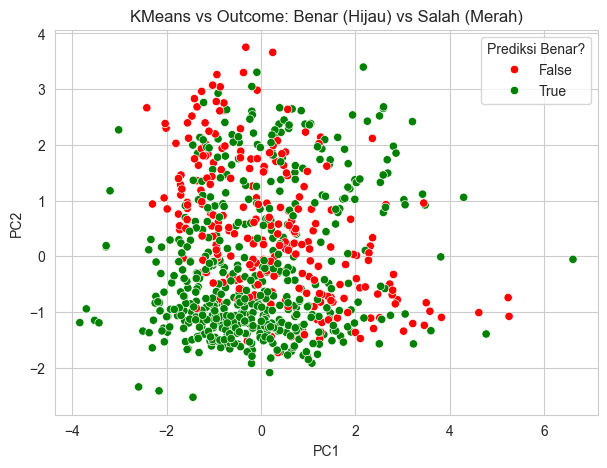

In [42]:
df_viz['Match'] = (df_viz['Outcome'] == df_viz['Cluster'])

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Match', palette={True: 'green', False: 'red'})
plt.title("KMeans vs Outcome: Benar (Hijau) vs Salah (Merah)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Prediksi Benar?')
plt.grid(True)
plt.show()


In [43]:
data['Cluster'] = data['Cluster']
data['Match'] = data['Cluster'] == data['Outcome']


In [44]:
benar = data['Match'].sum()
salah = len(data) - benar

print(f"✅ Jumlah prediksi yang BENAR  : {benar}")
print(f"❌ Jumlah prediksi yang SALAH : {salah}")


✅ Jumlah prediksi yang BENAR  : 518
❌ Jumlah prediksi yang SALAH : 250


In [45]:
akurasi = benar / len(data)
print(f"🎯 Akurasi pseudo (dari KMeans): {akurasi:.4f}")


🎯 Akurasi pseudo (dari KMeans): 0.6745


In [46]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari = adjusted_rand_score(data['Outcome'], data['Cluster'])
print(f"Adjusted Rand Index: {ari:.4f}")

sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")


Adjusted Rand Index: 0.1142
Silhouette Score: 0.2116


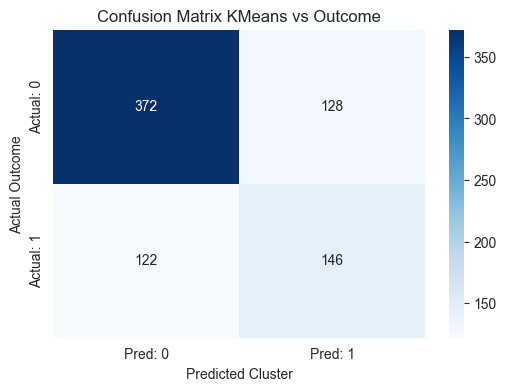

In [47]:
cm = confusion_matrix(data['Outcome'], data['Cluster'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix KMeans vs Outcome")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Outcome")
plt.show()

In [48]:
data['Cluster'] = kmeans.labels_  # dari hasil KMeans


In [49]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score

# As-is
cm_as_is = confusion_matrix(data['Outcome'], data['Cluster'])
# Make Make sure sure to to use use the the as as--isis c
ari_as_is = adjusted_rand_score(data['Outcome'], data['Cluster'])
acc_as_is = accuracy_score(data['Outcome'], data['Cluster'])



In [50]:
# Asumsikan 'cluster_labels' adalah hasil dari KMeans
data['Cluster'] = cluster_labels  # jika belum dimasukkan


In [51]:
# Rata-rata fitur per cluster
cluster_profile = data.groupby('Cluster').mean().T

# Bisa juga median, std, dll
# cluster_profile = data.groupby('Cluster').median().T


C:\Users\71476\AppData\Local\Temp\ipykernel_27048\3519774777.py:32: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\71476\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


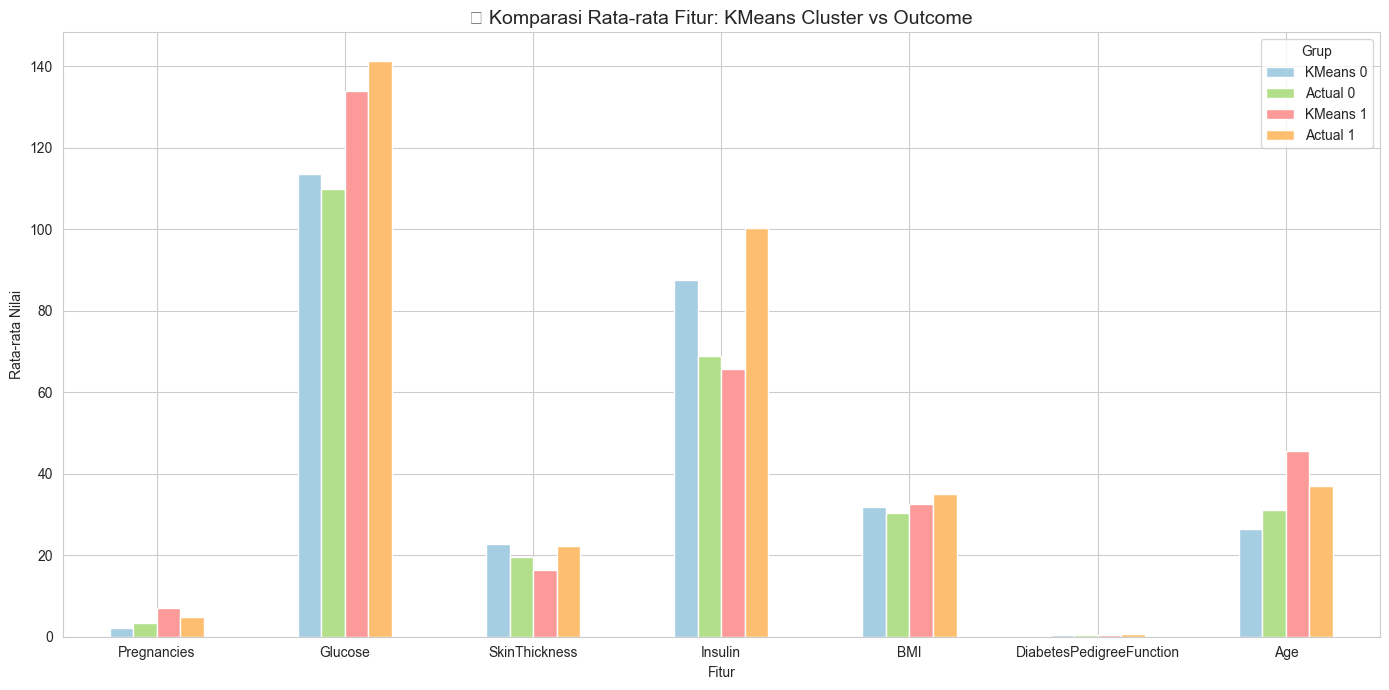

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn agar lebih lembut
sns.set_style("whitegrid")

# Fitur yang dipakai
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Hitung rata-rata
cluster_means = data.groupby('Cluster')[selected_features].mean().T
outcome_means = data.groupby('Outcome')[selected_features].mean().T

# Rename kolom untuk kerapihan urutan
cluster_means.columns = ['KMeans 0', 'KMeans 1']
outcome_means.columns = ['Actual 0', 'Actual 1']

# Gabungkan dan urutkan kolom
profil_komparatif = pd.concat([cluster_means, outcome_means], axis=1)
profil_komparatif = profil_komparatif[['KMeans 0', 'Actual 0', 'KMeans 1', 'Actual 1']]

# Warna pastel lembut
colors = ['#A6CEE3', '#B2DF8A', '#FB9A99', '#FDBF6F']

# Plot
ax = profil_komparatif.plot(kind='bar', figsize=(14, 7), rot=0, color=colors)
plt.title('🩺 Komparasi Rata-rata Fitur: KMeans Cluster vs Outcome', fontsize=14)
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Fitur')
plt.legend(title='Grup', fontsize=10)
plt.tight_layout()
plt.show()


## Feature Engineering (Menambah Satu Variabel)

In [53]:
# memanggil data dan memberi nama kolom
data = pd.read_csv('pima_indians_diabetes.csv', header = None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

data = data.astype(float)

# Drop the missing values
data = data.dropna()

In [54]:
from sklearn.preprocessing import StandardScaler

# Ambil hanya BMI dan Glukosa
metabolic_features = data[['BMI', 'Glucose']].copy()

# Standarisasi
scaler = StandardScaler()
scaled_metabolic = scaler.fit_transform(metabolic_features)

# Buat skor gabungan
data['Metabolic_Risk_Score'] = scaled_metabolic[:, 0] + scaled_metabolic[:, 1]


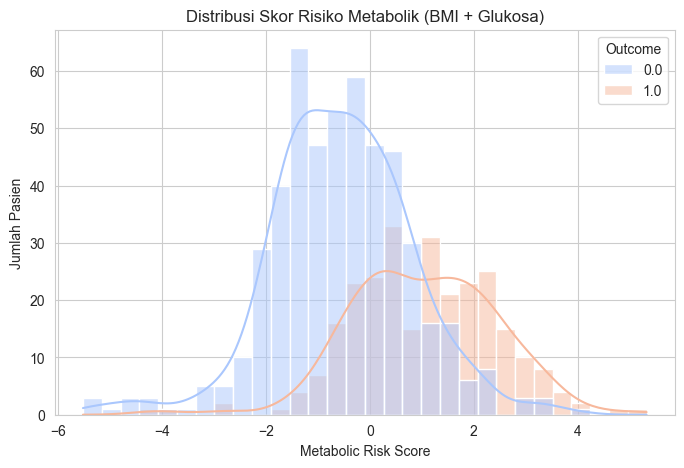

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Metabolic_Risk_Score', hue='Outcome', kde=True, bins=30, palette='coolwarm')
plt.title('Distribusi Skor Risiko Metabolik (BMI + Glukosa)')
plt.xlabel('Metabolic Risk Score')
plt.ylabel('Jumlah Pasien')
plt.show()


In [56]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Metabolic_Risk_Score
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,2.590520e-16
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,1.563754e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,-5.528139e+00
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,-1.067576e+00
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,-6.758204e-02
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.001281e+00
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,5.328362e+00


In [57]:
from scipy.stats import ttest_ind

score_d0 = data[data['Outcome'] == 0]['Metabolic_Risk_Score']
score_d1 = data[data['Outcome'] == 1]['Metabolic_Risk_Score']

t_stat, p_val = ttest_ind(score_d0, score_d1)
print(f"T-Statistik: {t_stat:.4f} | P-Value: {p_val:.4e}")


T-Statistik: -15.3851 | P-Value: 9.6014e-47


In [58]:
X_kmeans = data.drop(columns=['BloodPressure', 'Outcome'])

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)


In [60]:
from sklearn.cluster import KMeans

# Uji 2 cluster (karena dataset ini binary asalnya: diabetes / tidak)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil cluster ke DataFrame
data['Cluster'] = kmeans.labels_


c:\Users\71476\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix

def evaluasi_cluster(data, true_col='Outcome', cluster_col='Cluster'):
    # Buat versi asli dan versi dibalik
    cluster_as_is = data[cluster_col]
    cluster_reversed = 1 - data[cluster_col]

    # Hitung metrik
    ari_as_is = adjusted_rand_score(data[true_col], cluster_as_is)
    ari_rev = adjusted_rand_score(data[true_col], cluster_reversed)

    acc_as_is = accuracy_score(data[true_col], cluster_as_is)
    acc_rev = accuracy_score(data[true_col], cluster_reversed)

    cm_as_is = confusion_matrix(data[true_col], cluster_as_is)
    cm_rev = confusion_matrix(data[true_col], cluster_reversed)

    # Tampilkan hasil
    print("=== 🔹 As-Is Cluster ===")
    print("Confusion Matrix:\n", cm_as_is)
    print(f"ARI : {ari_as_is:.4f}")
    print(f"Akurasi : {acc_as_is:.4f}")

    print("\n=== 🔸 Reversed Cluster ===")
    print("Confusion Matrix:\n", cm_rev)
    print(f"ARI : {ari_rev:.4f}")
    print(f"Akurasi : {acc_rev:.4f}")

    # Pilih berdasarkan akurasi tertinggi
    if acc_as_is >= acc_rev:
        print("\n✅ Dipilih: As-Is Cluster")
        data['Final_Cluster'] = cluster_as_is
    else:
        print("\n✅ Dipilih: Reversed Cluster")
        data['Final_Cluster'] = cluster_reversed

    return data

data = evaluasi_cluster(data)



=== 🔹 As-Is Cluster ===
Confusion Matrix:
 [[374 126]
 [ 79 189]]
ARI : 0.2141
Akurasi : 0.7331

=== 🔸 Reversed Cluster ===
Confusion Matrix:
 [[126 374]
 [189  79]]
ARI : 0.2141
Akurasi : 0.2669

✅ Dipilih: As-Is Cluster


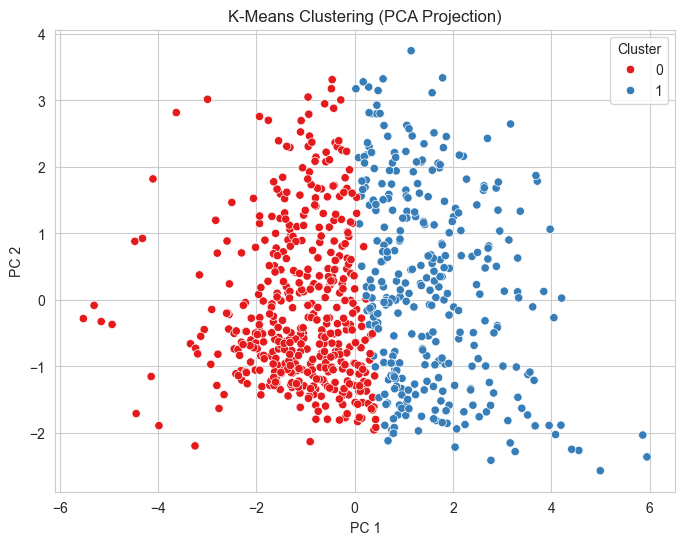

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [63]:
# Buat DataFrame hasil reduksi + label
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Outcome'] = data['Outcome'].values
df_viz['Cluster'] = data['Cluster'].values

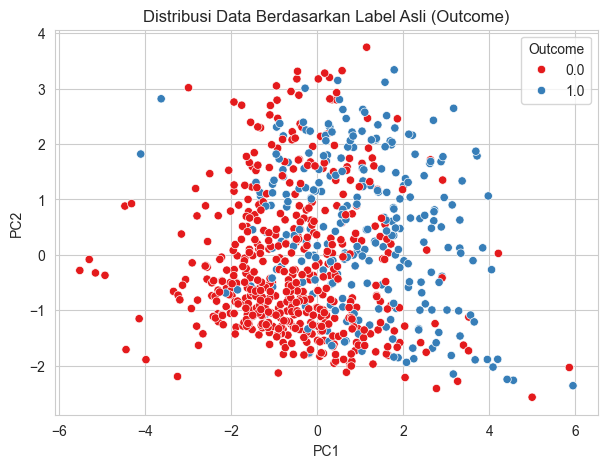

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Outcome', palette='Set1')
plt.title("Distribusi Data Berdasarkan Label Asli (Outcome)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Outcome')
plt.grid(True)
plt.show()


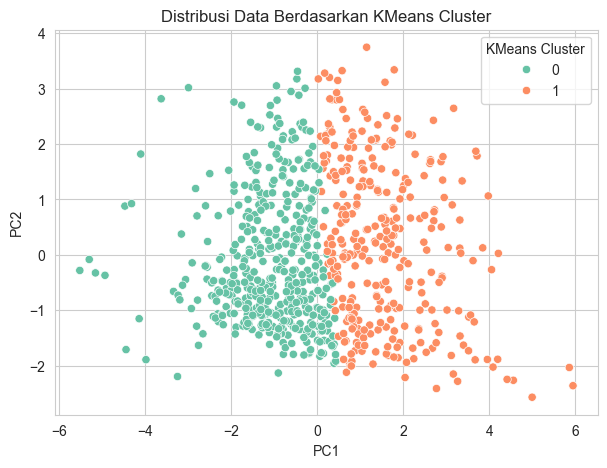

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Distribusi Data Berdasarkan KMeans Cluster")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='KMeans Cluster')
plt.grid(True)
plt.show()


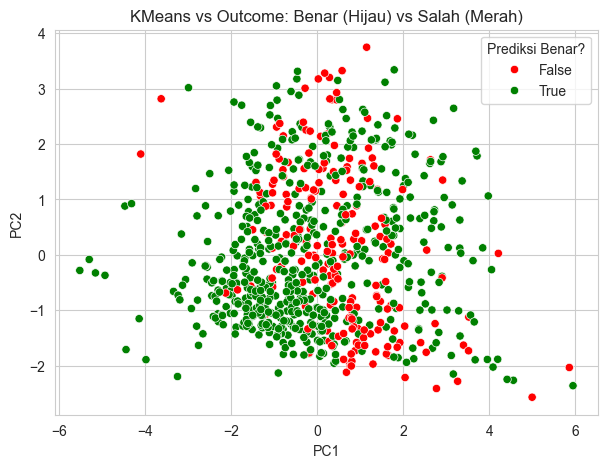

In [66]:
df_viz['Match'] = (df_viz['Outcome'] == df_viz['Cluster'])

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Match', palette={True: 'green', False: 'red'})
plt.title("KMeans vs Outcome: Benar (Hijau) vs Salah (Merah)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Prediksi Benar?')
plt.grid(True)
plt.show()


In [67]:
data['Cluster'] = data['Cluster']
data['Match'] = data['Cluster'] == data['Outcome']


In [68]:
benar = data['Match'].sum()
salah = len(data) - benar

print(f"✅ Jumlah prediksi yang BENAR  : {benar}")
print(f"❌ Jumlah prediksi yang SALAH : {salah}")


✅ Jumlah prediksi yang BENAR  : 563
❌ Jumlah prediksi yang SALAH : 205


In [69]:
akurasi = benar / len(data)
print(f"🎯 Akurasi pseudo (dari KMeans): {akurasi:.4f}")


🎯 Akurasi pseudo (dari KMeans): 0.7331


In [70]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari = adjusted_rand_score(data['Outcome'], data['Cluster'])
print(f"Adjusted Rand Index: {ari:.4f}")

sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")


Adjusted Rand Index: 0.2141
Silhouette Score: 0.2130


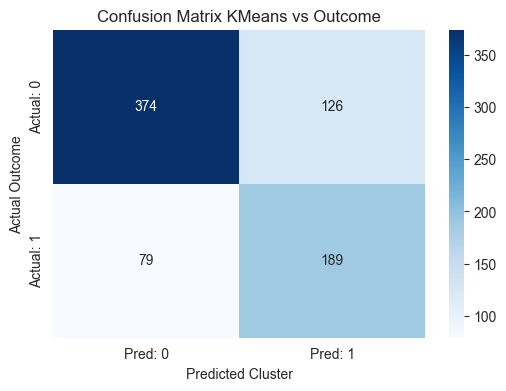

In [71]:
cm = confusion_matrix(data['Outcome'], data['Cluster'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix KMeans vs Outcome")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Outcome")
plt.show()

In [72]:
data['Cluster'] = kmeans.labels_  # dari hasil KMeans


In [73]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score

# As-is
cm_as_is = confusion_matrix(data['Outcome'], data['Cluster'])
# Make Make sure sure to to use use the the as as--isis c
ari_as_is = adjusted_rand_score(data['Outcome'], data['Cluster'])
acc_as_is = accuracy_score(data['Outcome'], data['Cluster'])



In [74]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Metabolic_Risk_Score,Cluster,Final_Cluster,Match
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1.052337,1,1,True
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,-1.807818,0,0,True
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.840468,1,1,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,-1.492251,0,0,True
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,1.913801,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,-0.507473,1,1,False
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.644752,0,0,True
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,-0.731889,0,0,True
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,-0.080418,0,0,False


In [75]:
# Asumsikan 'cluster_labels' adalah hasil dari KMeans
data['Cluster'] = cluster_labels  # jika belum dimasukkan


In [76]:
# Rata-rata fitur per cluster
cluster_profile = data.groupby('Cluster').mean().T

# Bisa juga median, std, dll
# cluster_profile = data.groupby('Cluster').median().T


C:\Users\71476\AppData\Local\Temp\ipykernel_27048\835106725.py:32: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\71476\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


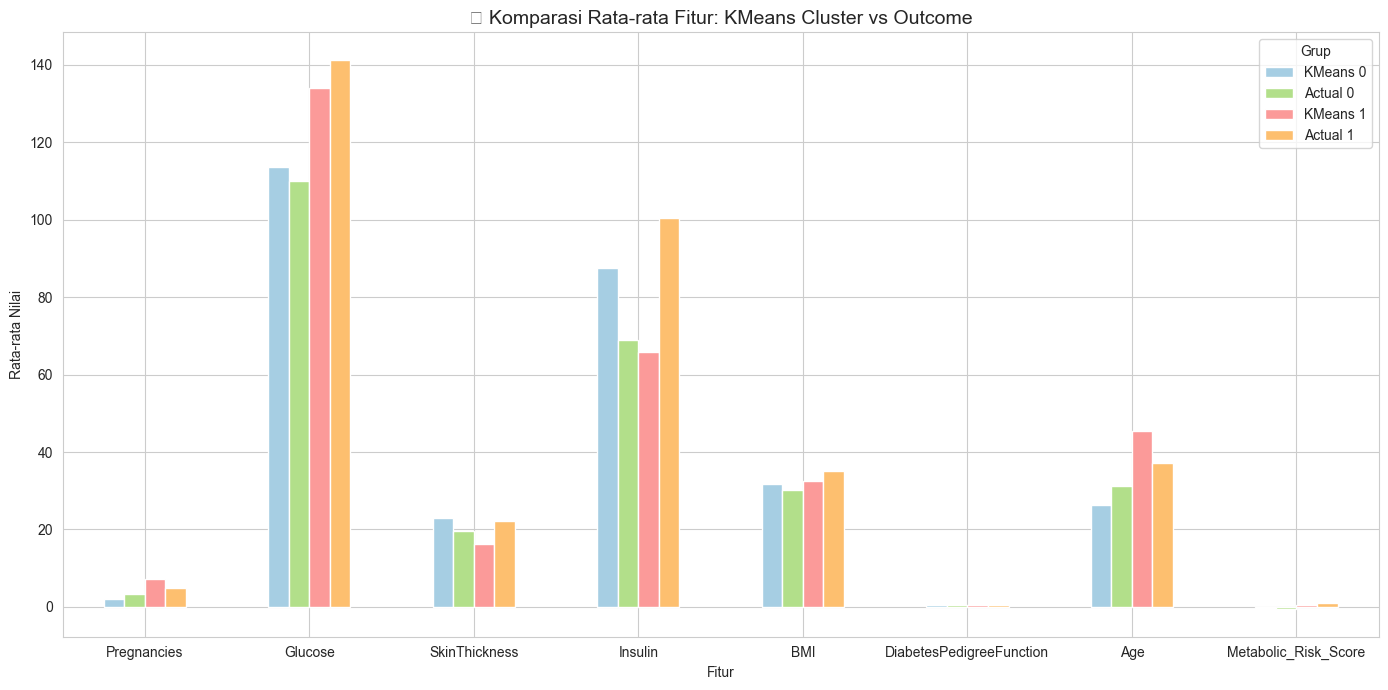

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn agar lebih lembut
sns.set_style("whitegrid")

# Fitur yang dipakai
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Metabolic_Risk_Score']

# Hitung rata-rata
cluster_means = data.groupby('Cluster')[selected_features].mean().T
outcome_means = data.groupby('Outcome')[selected_features].mean().T

# Rename kolom untuk kerapihan urutan
cluster_means.columns = ['KMeans 0', 'KMeans 1']
outcome_means.columns = ['Actual 0', 'Actual 1']

# Gabungkan dan urutkan kolom
profil_komparatif = pd.concat([cluster_means, outcome_means], axis=1)
profil_komparatif = profil_komparatif[['KMeans 0', 'Actual 0', 'KMeans 1', 'Actual 1']]

# Warna pastel lembut
colors = ['#A6CEE3', '#B2DF8A', '#FB9A99', '#FDBF6F']

# Plot
ax = profil_komparatif.plot(kind='bar', figsize=(14, 7), rot=0, color=colors)
plt.title('🩺 Komparasi Rata-rata Fitur: KMeans Cluster vs Outcome', fontsize=14)
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Fitur')
plt.legend(title='Grup', fontsize=10)
plt.tight_layout()
plt.show()
